In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import re
import imageio

import matplotlib.cm as cm
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cm.Dark2.colors)

In [6]:
# nexus_df = pd.read_csv("../files/reco_v1/reco_mbb_10bar_vertex_seed_6mm.csv")
nexus_df = pd.read_csv("../files/reco_v1/reco_mbb_10bar_nexus.csv")
nexus_df_AI = pd.read_csv("../files/reco_v1/reco_mbb_10bar_nexus_angle_improvement.csv") # With angular improvements
nexus_df_smear = pd.read_csv("../files/reco_v1/reco_mbb_10bar_4mmsmear.csv") # With angular improvements


display(nexus_df)
display(nexus_df_AI)

,event_id,T1_gen,costheta_gen,T1_true,costheta_true,T1_reco,costheta_reco
0,1300.0,1.359519,-0.576218,0.0,0.0,1.359533,0.999820
1,1301.0,2.015892,-0.331767,0.0,0.0,2.114395,0.812097
2,1302.0,2.379060,-0.091801,0.0,0.0,2.434635,-0.202581
3,1303.0,1.592232,0.555831,0.0,0.0,2.345242,0.636309
4,1304.0,1.376922,0.479640,0.0,0.0,1.304406,0.509835
...,...,...,...,...,...,...,...
4126,8642.0,1.496628,0.460706,0.0,0.0,1.496628,0.212821
4127,8643.0,2.009103,-0.358592,0.0,0.0,2.009103,-0.116914
4128,8644.0,1.770787,0.174194,0.0,0.0,1.770787,0.470477
4129,8645.0,1.575343,-0.566182,0.0,0.0,1.603683,1.000000


,event_id,T1_gen,costheta_gen,T1_true,costheta_true,T1_reco,costheta_reco
0,1300.0,1.359519,-0.576218,0.0,0.0,1.341673,-0.756833
1,1301.0,2.015892,-0.331767,0.0,0.0,2.114395,0.812097
2,1302.0,2.379060,-0.091801,0.0,0.0,2.434635,-0.202581
3,1303.0,1.592232,0.555831,0.0,0.0,2.345242,0.636309
4,1304.0,1.376922,0.479640,0.0,0.0,1.304406,0.509835
...,...,...,...,...,...,...,...
4126,8642.0,1.496628,0.460706,0.0,0.0,1.496628,0.212821
4127,8643.0,2.009103,-0.358592,0.0,0.0,2.009103,-0.116914
4128,8644.0,1.770787,0.174194,0.0,0.0,1.770787,0.470477
4129,8645.0,1.575343,-0.566182,0.0,0.0,1.606324,1.000000


In [7]:
def PlotHist(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    elif (labelling == "pressure"):
        label = f"{model} {nme} {pressure}"
        title = binsize
    else:
        label = labelling
        title = pressure

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)
    ax.set_ylim(0, 1.4)

def PlotHistGen(dfs, varname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel):
    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname], bins = bins_, density=norm, log=useLog, histtype="step", label = f"Gen", linewidth=2, color = "k");
    ax.legend()

def PlotHistDiff(dfs, varname,genvarname, model, nme, binsize, pressure, ax, norm, useLog, bins_, xlabel, ylabel, labelling):

    if (labelling == "binsize"):
        label = f"{model} {nme} {binsize}"
        title = pressure
    elif (labelling == "pressure"):
        label = f"{model} {nme} {pressure}"
        title = binsize
    else:
        label = labelling
        title = pressure

    query = dfs[ (dfs.Model == model) & (dfs.nme == nme) & (dfs.Pressure == pressure) & (dfs.binsize == binsize) ]
    ax.hist(query[varname] - query[genvarname] , bins = bins_, density=norm, log=useLog, histtype="step", label = label, linewidth=2);
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.set_title(title)
    # ax.set_ylim(0,4)
    

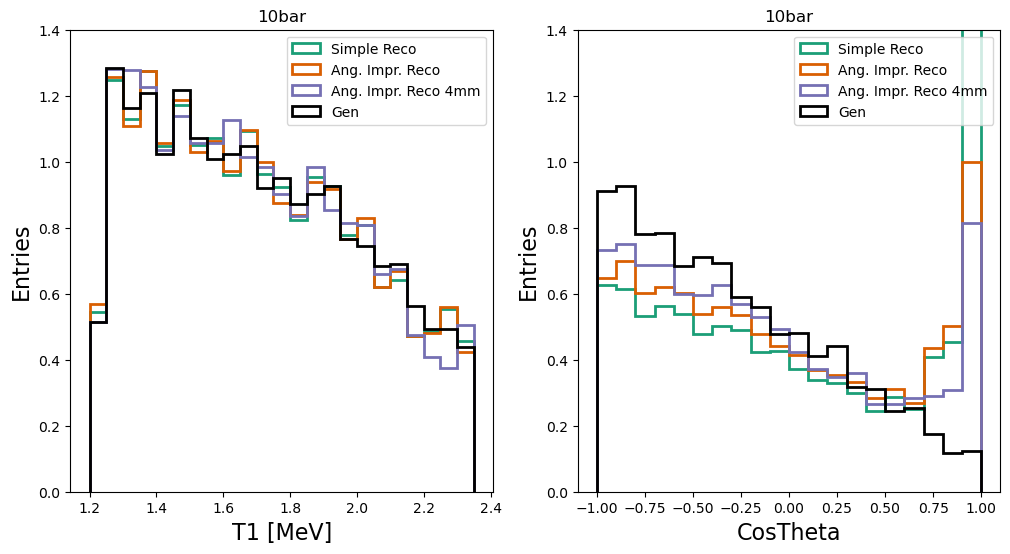

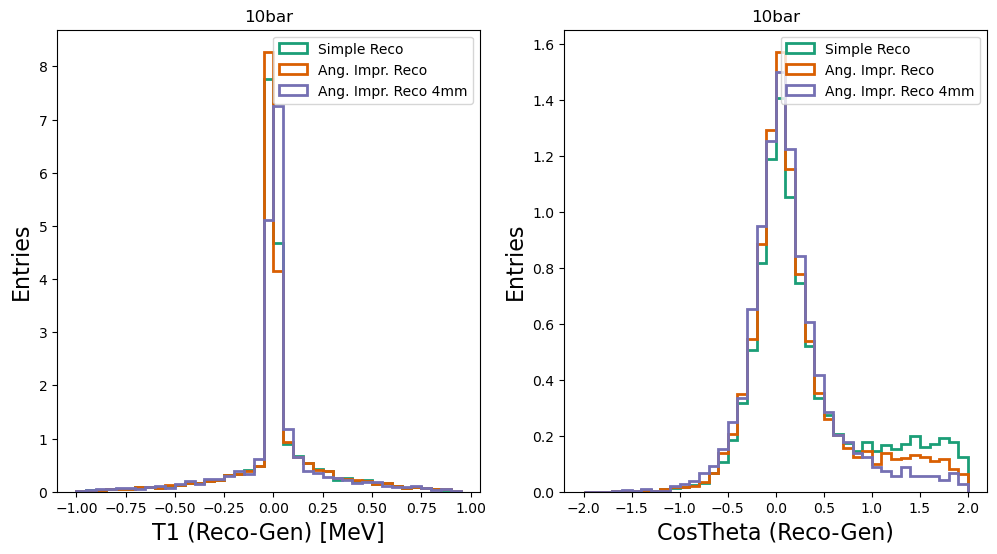

In [9]:
nexus_df['Model'] = "mbb"
nexus_df['nme'] = "SM"
nexus_df['Pressure'] = "10bar"
nexus_df['binsize'] = "nexus"

nexus_df_AI['Model'] = "mbb"
nexus_df_AI['nme'] = "SM"
nexus_df_AI['Pressure'] = "10bar"
nexus_df_AI['binsize'] = "nexus"

nexus_df_smear['Model'] = "mbb"
nexus_df_smear['nme'] = "SM"
nexus_df_smear['Pressure'] = "10bar"
nexus_df_smear['binsize'] = "4mm"

norm = True
useLog = False


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

PlotHist(nexus_df,"T1_reco", "mbb", "SM", "nexus","10bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "Simple Reco")
PlotHist(nexus_df_AI,"T1_reco", "mbb", "SM", "nexus","10bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "Ang. Impr. Reco")
PlotHist(nexus_df_smear,"T1_reco", "mbb", "SM", "4mm","10bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries", "Ang. Impr. Reco 4mm")

PlotHistGen(nexus_df, "T1_gen",  "mbb", "SM", "nexus", "10bar", ax1, norm, useLog, np.arange(1.2,2.4,0.05), "T1 [MeV]", "Entries")


PlotHist(nexus_df,"costheta_reco", "mbb", "SM", "nexus","10bar", ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries", "Simple Reco")
PlotHist(nexus_df_AI,"costheta_reco", "mbb", "SM", "nexus","10bar", ax2, norm, useLog, np.arange(-1,1.1,0.1),"CosTheta", "Entries", "Ang. Impr. Reco")
PlotHist(nexus_df_smear,"costheta_reco", "mbb", "SM", "4mm","10bar", ax2, norm, useLog, np.arange(-1,1.1,0.1),"CosTheta", "Entries", "Ang. Impr. Reco 4mm")

PlotHistGen(nexus_df, "costheta_gen", "mbb", "SM",  "nexus","10bar", ax2, norm, useLog, np.arange(-1,1.1,0.1), "CosTheta", "Entries")

plt.savefig(f"../files/plots/RecoImprovements/T1_Costheta_SM_10bar.png", dpi=200)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))

PlotHistDiff(nexus_df,    "T1_reco", "T1_gen", "mbb", "SM","nexus","10bar", ax1, norm, useLog,  np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "Simple Reco")
PlotHistDiff(nexus_df_AI,    "T1_reco", "T1_gen", "mbb", "SM","nexus","10bar", ax1, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "Ang. Impr. Reco")
PlotHistDiff(nexus_df_smear,    "T1_reco", "T1_gen", "mbb", "SM","4mm","10bar", ax1, norm, useLog, np.arange(-1,1,0.05), "T1 (Reco-Gen) [MeV]", "Entries", "Ang. Impr. Reco 4mm")

PlotHistDiff(nexus_df,    "costheta_reco","costheta_gen", "mbb", "SM", "nexus","10bar", ax2, norm, useLog, np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "Simple Reco")
PlotHistDiff(nexus_df_AI,    "costheta_reco","costheta_gen", "mbb", "SM", "nexus","10bar", ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "Ang. Impr. Reco")
PlotHistDiff(nexus_df_smear,    "costheta_reco","costheta_gen", "mbb", "SM", "4mm","10bar", ax2, norm, useLog,  np.arange(-2,2.1,0.1), "CosTheta (Reco-Gen)", "Entries", "Ang. Impr. Reco 4mm")

plt.savefig(f"../files/plots/RecoImprovements/T1_Costheta_diff_SM_10bar.png", dpi=200)